## Description of the columns.  
### Price is the Dependent column for this project because we are predicting the price of the flight.  
1. Airline  :  Company Name.  
2. Date_of_Journey  :  Date of travelling.  
3. Source  :  Starting Point or City.  
4. Destination  :  Travelling destination city.  
5. Route  :   Route include the path or all the city between source and destination.   
              First city is source, last city is destination, other cities between route.  
6. Dep_Time  :  The time of departure in 24 hours time format.  
7. Arrival_Time  : Reaching time to destination in 24 hours format.  
8. Duration  :  Total time taken to reach the destination from source.  
9. Total_Stops  :  Number of Stops between source and destination.  
10. Additional_Info  :  Extra Information about the flight.  
11. Price  :  The total amount for travelling from source to destination in Rupees.


In [1]:
# Importing the basic libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns
import os

In [2]:
# Getting the dataset file path.
data_path = os.path.join("Data","flight_dataset.csv")
data_path

'Data/flight_dataset.csv'

In [3]:
# Reading the data and creating the copy of the file.
data = pd.read_csv(data_path)
df= data.copy()
df.shape

(10683, 11)

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


## Basic Details of Flight Company from Google. 

1. Totaly there are 8 companys in this dataset.  
2. Multiple carriers means a Connecting flight between source and destination.  
3. Trujet this flight ceased all operations in February 2022, so we will delete all the records from this flight.  
4. In India now there are 13 active Airlnes company.  

In [5]:
company_list = list(df["Airline"].unique())
company_list

['IndiGo',
 'Air India',
 'Jet Airways',
 'SpiceJet',
 'Multiple carriers',
 'GoAir',
 'Vistara',
 'Air Asia',
 'Vistara Premium economy',
 'Jet Airways Business',
 'Multiple carriers Premium economy',
 'Trujet']

In [6]:
# Total records with Trujet airlines company.
df[df["Airline"] == "Trujet"]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2878,Trujet,6/03/2019,Mumbai,Hyderabad,BOM → NDC → HYD,13:05,16:20,3h 15m,1 stop,No info,4140


There are 220 duplicate values in the table.  

In [7]:
df.duplicated().sum()

220

In [8]:
# removing the duplicates and Trujet data.
print(f"The shape of data before removing duplicates is : {df.shape}")
df.drop_duplicates(inplace=True)
df.drop(2878,axis=0,inplace=True)
print(f"The shape of data after removing duplicates is : {df.shape}")

The shape of data before removing duplicates is : (10683, 11)
The shape of data after removing duplicates is : (10462, 11)


The Duplicates and the Trujet rows has been removed.  

In [9]:
# Check for na values.
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

There is only 1 record with null value.

In [10]:
# Change the date of journey format to date time.
df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"],infer_datetime_format=True)

/tmp/ipykernel_368/1399353182.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"],infer_datetime_format=True)
/tmp/ipykernel_368/1399353182.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"],infer_datetime_format=True)


The Date_of_Journey column is having the dates but not in correct form so we will cgange it to correct form and split the date, month, and year into saperate columns.  

In [11]:
columns = list(df.columns)

In [12]:
# Convert the date to 3 columns day, month,and year
df['Day']=df['Date_of_Journey'].dt.day
df['Month']=df['Date_of_Journey'].dt.month
df['Year']=df['Date_of_Journey'].dt.year

Time is in the 24:00 hour format and the data is in the 00hr:00m form where h is hour and m is minute. So we will split it to hours and min saperate columns.

In [13]:
# spliting the time to hour and min
df["Dep_hour"] = df["Dep_Time"].str.split(":").str[0]
df["Dep_min"] = df["Dep_Time"].str.split(":").str[1]

In [14]:
# spliting the time to hour and min
df["Arrival_Time"] = df["Arrival_Time"].str.split(" ").str[0]
df["Arival_hour"] = df["Arrival_Time"].str.split(":").str[0]
df["Arival_min"] = df["Arrival_Time"].str.split(":").str[1]

There was only 1 record with nan value in Total_Stops column. we can replace it with 0 or drop the record.  
There is so stops between source and destination in nan recored so we can replace with 0 if required.  
In this case i am droping the nan record.  

In [15]:
# There was only 1 record with nan value so i have droped it.
df.dropna(inplace=True)

In [16]:
df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

We will map the categorical data in Total_Stops column with numeric data.  

In [17]:
# converting the categorical value to numerical values.
dic = {'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4}
df["Total_Stops"] = df["Total_Stops"].map(dic)

In [18]:
# considering this as a false value we can drop this.
df[df["Duration"] == "5m"]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_hour,Dep_min,Arival_hour,Arival_min
6474,Air India,2019-03-06,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,5m,2,No info,17327,6,3,2019,16,50,16,55


In the Duration column we have a record with 5m and 2 stops between source and destination, with is not possible.  
So we can drop this record or replace it. In this case i am droping the record.  

In [19]:
df.drop(6474,axis=0,inplace=True)

In [20]:
df.shape

(10460, 18)

In [21]:
# spliting the duration into hours and min saperate columns.
df["Duration"] = df["Duration"].str.split(" ")

In [22]:
df["Trveling_hour"] = df["Duration"].str[0].str.split("h").str[0]
df["Trveling_min"] = df["Duration"].str[1].str.split("m").str[0]

Duration Column is in 3hr 5min format so we will split the data to hour and min saperate columns.  
And drop all the othere columns which we have converted to another columns.  

In [23]:
df.drop(labels=["Date_of_Journey","Route","Dep_Time","Arrival_Time","Duration","Additional_Info"],axis=1,inplace=True)

In [24]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Day,Month,Year,Dep_hour,Dep_min,Arival_hour,Arival_min,Trveling_hour,Trveling_min
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2019,22,20,01,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,2019,05,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,2019,09,25,04,25,19,NaN
3,IndiGo,Kolkata,Banglore,1,6218,12,5,2019,18,05,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,2019,16,50,21,35,4,45


In [25]:
df.isna().sum()

Airline             0
Source              0
Destination         0
Total_Stops         0
Price               0
Day                 0
Month               0
Year                0
Dep_hour            0
Dep_min             0
Arival_hour         0
Arival_min          0
Trveling_hour       0
Trveling_min     1005
dtype: int64

In [26]:
df["Trveling_min"].unique()

array(['50', '25', nan, '45', '30', '5', '15', '35', '10', '20', '55',
       '40'], dtype=object)

We have nan values in Trveling_min column and this indicate that the duration is in exact hour, so we will replace nan with 0.  

In [27]:
# we have some null values in Trveling_min this means the time is exact hours so replace nan with 0
df["Trveling_min"] = df["Trveling_min"].fillna(0)

In [28]:
df["Trveling_min"].unique()

array(['50', '25', 0, '45', '30', '5', '15', '35', '10', '20', '55', '40'],
      dtype=object)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10460 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Airline        10460 non-null  object
 1   Source         10460 non-null  object
 2   Destination    10460 non-null  object
 3   Total_Stops    10460 non-null  int64 
 4   Price          10460 non-null  int64 
 5   Day            10460 non-null  int32 
 6   Month          10460 non-null  int32 
 7   Year           10460 non-null  int32 
 8   Dep_hour       10460 non-null  object
 9   Dep_min        10460 non-null  object
 10  Arival_hour    10460 non-null  object
 11  Arival_min     10460 non-null  object
 12  Trveling_hour  10460 non-null  object
 13  Trveling_min   10460 non-null  object
dtypes: int32(3), int64(2), object(9)
memory usage: 1.1+ MB


In [30]:
df["Dep_hour"].unique()

array(['22', '05', '09', '18', '16', '08', '11', '20', '21', '17', '14',
       '04', '07', '10', '15', '06', '19', '23', '13', '02', '12', '00',
       '01', '03'], dtype=object)

In [31]:
# Converting the object type to Integer type.
df["Dep_hour"] = df["Dep_hour"].astype(int)
df["Dep_min"] = df["Dep_min"].astype(int)
df["Arival_hour"] = df["Arival_hour"].astype(int)
df["Arival_min"] = df["Arival_min"].astype(int)
df["Trveling_hour"] = df["Trveling_hour"].astype(int)
df["Trveling_min"] = df["Trveling_min"].astype(int)

Convert all the new columns data types from object to integer because this columns contain time in hours and min integer values.  

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10460 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Airline        10460 non-null  object
 1   Source         10460 non-null  object
 2   Destination    10460 non-null  object
 3   Total_Stops    10460 non-null  int64 
 4   Price          10460 non-null  int64 
 5   Day            10460 non-null  int32 
 6   Month          10460 non-null  int32 
 7   Year           10460 non-null  int32 
 8   Dep_hour       10460 non-null  int64 
 9   Dep_min        10460 non-null  int64 
 10  Arival_hour    10460 non-null  int64 
 11  Arival_min     10460 non-null  int64 
 12  Trveling_hour  10460 non-null  int64 
 13  Trveling_min   10460 non-null  int64 
dtypes: int32(3), int64(8), object(3)
memory usage: 1.1+ MB


In [33]:
# Saperate the categorical and numerical columns.
cat_col = df.columns[df.dtypes=='object']
num_col = df.columns[df.dtypes!='object']

In [34]:
cat_col

Index(['Airline', 'Source', 'Destination'], dtype='object')

In [35]:
num_col

Index(['Total_Stops', 'Price', 'Day', 'Month', 'Year', 'Dep_hour', 'Dep_min',
       'Arival_hour', 'Arival_min', 'Trveling_hour', 'Trveling_min'],
      dtype='object')

In [36]:
# getting the Unique values of categorical columns.
for i in cat_col:
    print(f"{i} : {df[i].unique()}")
    print()
    print(f"{df[i].value_counts()}")
    print("-"*60)

Airline : ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy']

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1693
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Name: count, dtype: int64
------------------------------------------------------------
Source : ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']

Source
Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       695
Chennai      381
Name: count, dtype: int64
------------------------------------------------------------
Destinati

We have 5 source and 6 destinations in the dataset.  
Most of the flights are started from Delhi.  
Cochi is the highest destination place.  
Count of Business and Premium class flight booked is less its only 21.  
11.5 % flights have connecting flight between source and destination, that is 1200 record out of 10400.   

In [37]:
for i in num_col:
    print(f"{i} : {df[i].unique()}")
    print("-"*60)

Total_Stops : [0 2 1 3 4]
------------------------------------------------------------
Price : [ 3897  7662 13882 ...  9790 12352 12648]
------------------------------------------------------------
Day : [24  1  9 12 27 18  3 15  6 21]
------------------------------------------------------------
Month : [3 5 6 4]
------------------------------------------------------------
Year : [2019]
------------------------------------------------------------
Dep_hour : [22  5  9 18 16  8 11 20 21 17 14  4  7 10 15  6 19 23 13  2 12  0  1  3]
------------------------------------------------------------
Dep_min : [20 50 25  5  0 55 45 40 10 15 35 30]
------------------------------------------------------------
Arival_hour : [ 1 13  4 23 21 11 10  5 19 22  9 12  6  8  3 20 16 18 15 14  0  2  7 17]
------------------------------------------------------------
Arival_min : [10 15 25 30 35  5  0 55 20 50 45 40]
------------------------------------------------------------
Trveling_hour : [ 2  7 19  5  4 1

In [38]:
import matplotlib.pyplot as plt 
import seaborn as sns


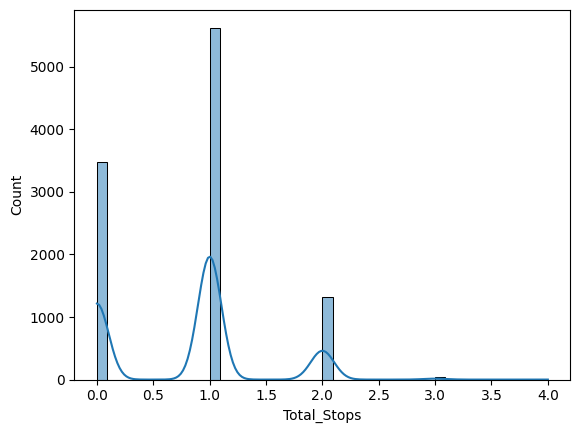

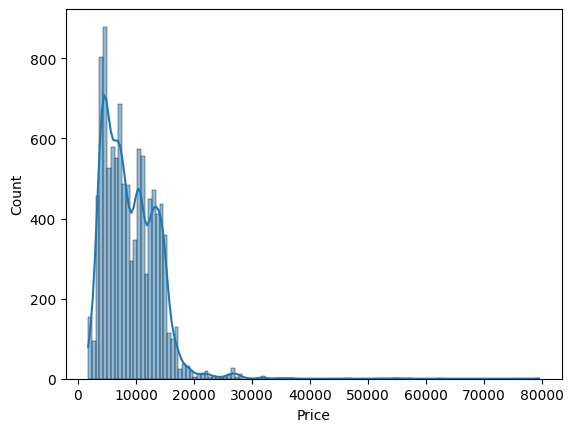

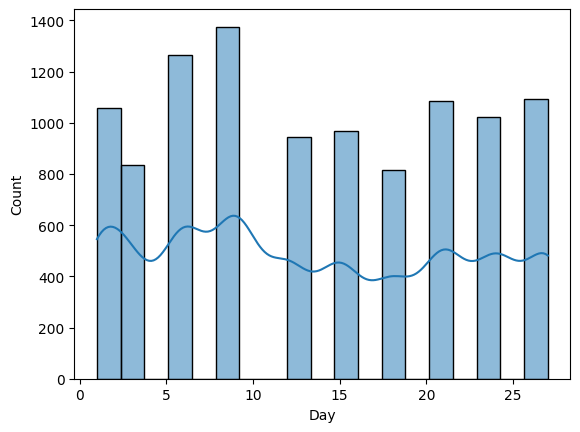

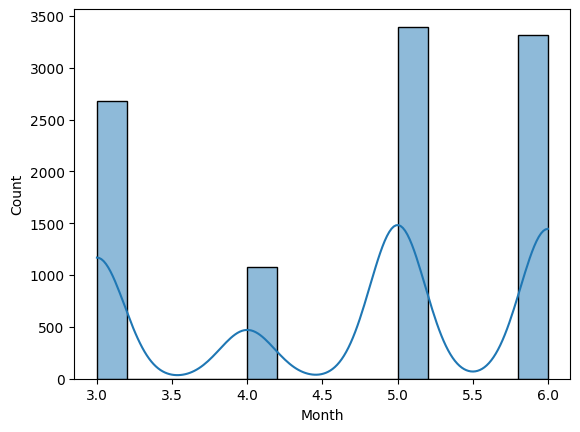

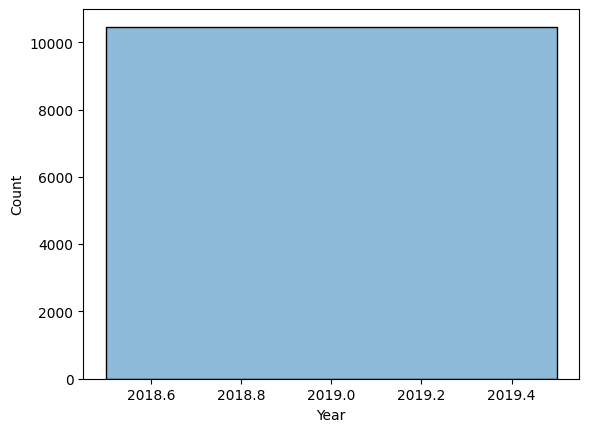

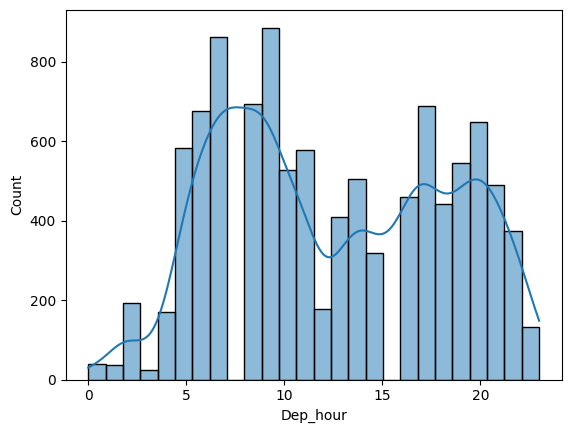

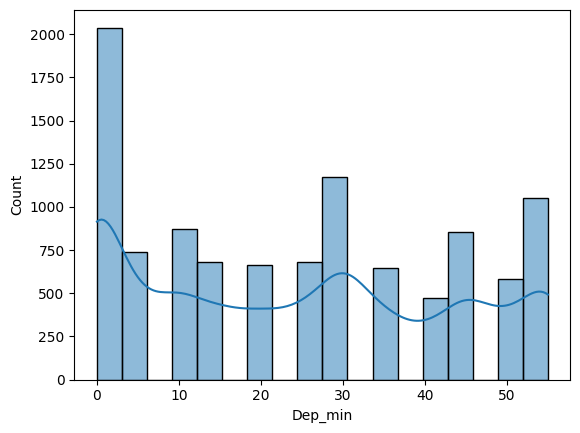

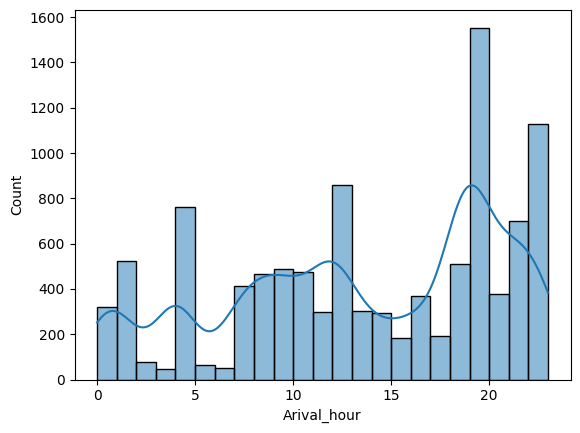

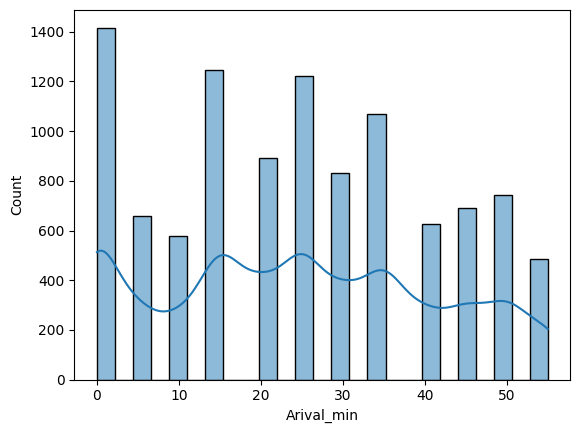

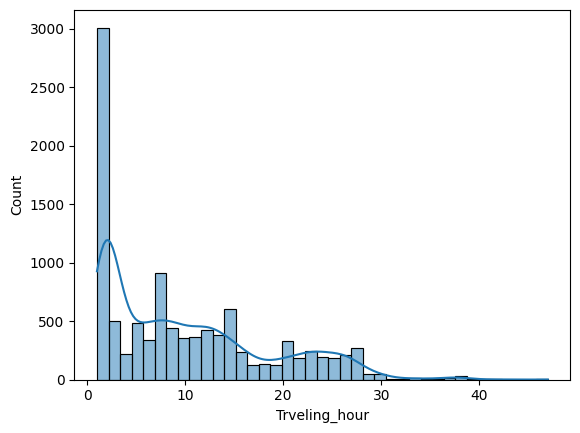

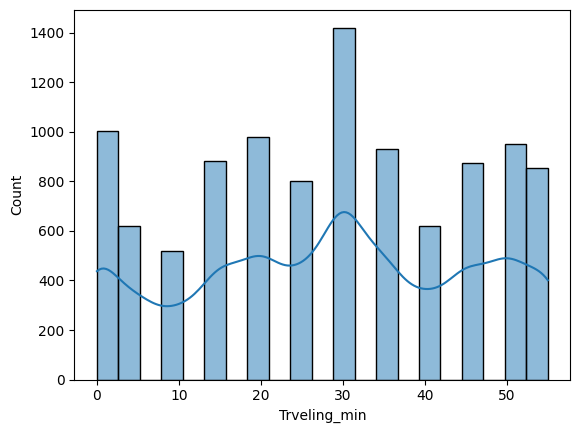

In [40]:

for i in num_col:
    plt.Figure(figsize=(18,10))
    sns.histplot(data=df,x=i,kde=True)
    plt.show()


In Above graphs x axis is represented by numerical feature and y axis is its count in the data.  
1. Most of the records are with 1 stops between source and destination.  
2. 90 % of the flight price is between 0 to 25000 only flight with price above 30K are only 24 records.  

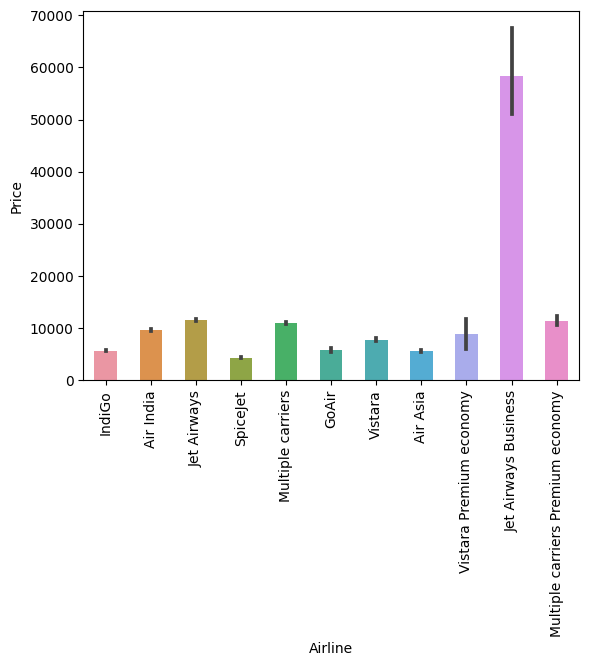

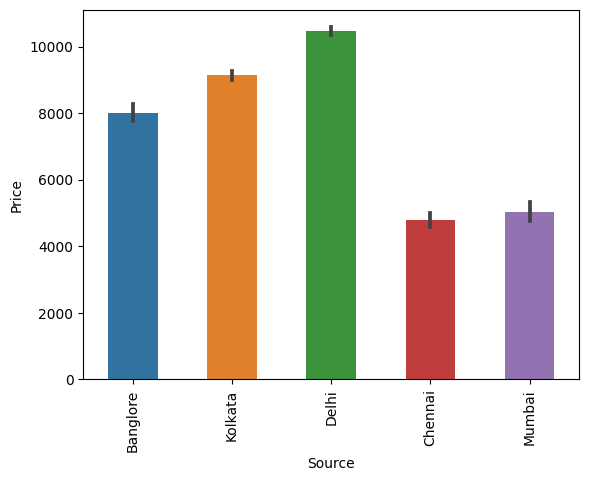

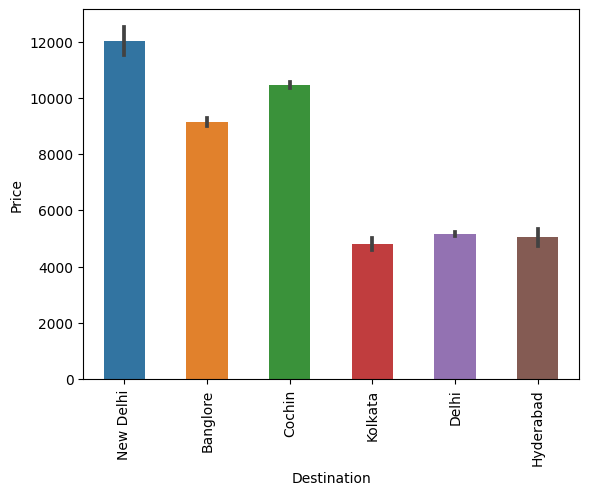

In [75]:
for i in cat_col:
    plt.Figure(figsize=(20,10))
    sns.barplot(data=df,x=df[i],y=df["Price"],width=0.5)
    plt.xticks(rotation=90)
    plt.show()


Highest price of the flight is from Jet airways Business class. Other all the flight prices from other airways is between 0 to 20K.  

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy')])

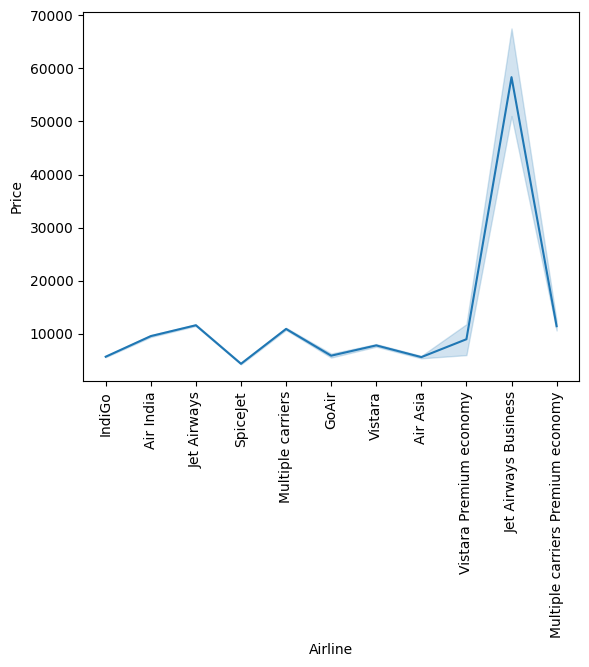

In [79]:
sns.lineplot(data=df,x=df["Airline"],y=df["Price"])
plt.xticks(rotation=90)

# Below steps are done to analyse the time impact on the flight price with linepot from seaborn.

In [80]:
new = data[["Date_of_Journey","Price"]]

In [81]:
new["Date_of_Journey"] = pd.to_datetime(new["Date_of_Journey"])

/tmp/ipykernel_368/320312515.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  new["Date_of_Journey"] = pd.to_datetime(new["Date_of_Journey"])
/tmp/ipykernel_368/320312515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new["Date_of_Journey"] = pd.to_datetime(new["Date_of_Journey"])


To analyse the time, date impact on the flight price we have to first sort the date values, then make data values column as index.  

In [82]:
new["Date_of_Journey"] = new["Date_of_Journey"].sort_values()

/tmp/ipykernel_368/3218359895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new["Date_of_Journey"] = new["Date_of_Journey"].sort_values()


In [83]:
new = new.set_index("Date_of_Journey")

(array([17956., 17970., 17987., 18001., 18017., 18031., 18048., 18062.,
        18078.]),
 [Text(17956.0, 0, '2019-03-01'),
  Text(17970.0, 0, '2019-03-15'),
  Text(17987.0, 0, '2019-04-01'),
  Text(18001.0, 0, '2019-04-15'),
  Text(18017.0, 0, '2019-05-01'),
  Text(18031.0, 0, '2019-05-15'),
  Text(18048.0, 0, '2019-06-01'),
  Text(18062.0, 0, '2019-06-15'),
  Text(18078.0, 0, '2019-07-01')])

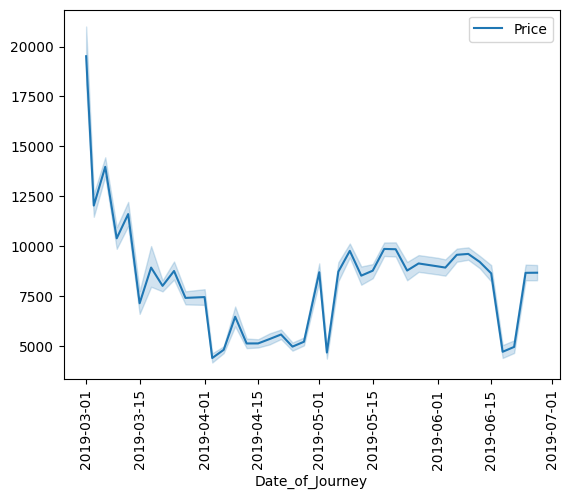

In [85]:

sns.lineplot(data=new)
plt.xticks(rotation=90)

From above line graph it indicates that the flight price has decreased from march to july and this record is from the year 2019 only.  